In [382]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [384]:
# Read the data into a Pandas DataFrame
Hospital_infect_data = pd.read_csv('Resources/Healthcare_Associated_Infections_Hospital.csv')
Hospital_infect_data.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2,NaN,01/01/2015,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"


In [385]:
# Get a brief summary of the dataframe.
Hospital_infect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222864 entries, 0 to 222863
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           222864 non-null  int64 
 1   Hospital Name         222864 non-null  object
 2   Address               222864 non-null  object
 3   City                  222864 non-null  object
 4   State                 222864 non-null  object
 5   ZIP Code              222864 non-null  int64 
 6   County Name           222240 non-null  object
 7   Phone Number          222864 non-null  int64 
 8   Measure Name          222864 non-null  object
 9   Measure ID            222864 non-null  object
 10  Compared to National  222864 non-null  object
 11  Score                 222864 non-null  object
 12  Footnote              141684 non-null  object
 13  Measure Start Date    222864 non-null  object
 14  Measure End Date      222864 non-null  object
 15  Location         

In [386]:
# Convert 'Score' column to numeric, coercing errors to NaN
Hospital_infect_data['Score'] = pd.to_numeric(Hospital_infect_data['Score'], errors='coerce')

# Check if 'Score' column conversion was successful
print(Hospital_infect_data['Score'].dtype)  # Should print 'float64' or 'int64'

float64


In [387]:
# Check for missing values
missing_values = Hospital_infect_data.isnull().sum()
missing_values

Provider ID                  0
Hospital Name                0
Address                      0
City                         0
State                        0
ZIP Code                     0
County Name                624
Phone Number                 0
Measure Name                 0
Measure ID                   0
Compared to National         0
Score                   124717
Footnote                 81180
Measure Start Date           0
Measure End Date             0
Location                     0
dtype: int64

In [388]:
# Check for duplicates in Uber data
duplicates = Hospital_infect_data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print or use num_duplicates as needed
print("Number of duplicate rows in Hospital_infect_data:", num_duplicates)

Number of duplicate rows in Hospital_infect_data: 0


In [389]:
# Get unique categories in 'Compared to National'
unique_Compared_National = Hospital_infect_data['Compared to National'].unique()

# Display the unique Compared to National
print("Unique Compared to National:")
print(unique_Compared_National)

Unique Compared to National:
['No Different than National Benchmark'
 'Worse than the National Benchmark' 'Better than the National Benchmark'
 'Not Available']


In [390]:
# Count the number of 'Not Available' entries
not_available_count = Hospital_infect_data[Hospital_infect_data['Compared to National'] == 'Not Available'].shape[0]
print(f"\nNumber of 'Not Available' entries: {not_available_count}")


Number of 'Not Available' entries: 121398


In [391]:
print(Hospital_infect_data['Measure Name'].unique())

# Count the number of unique measure names
num_unique_measure_names = Hospital_infect_data['Measure Name'].nunique()

print(f"Number of unique measure names: {num_unique_measure_names}")

['CLABSI: Lower Confidence Limit' 'CLABSI: Upper Confidence Limit'
 'CLABSI: Number of Procedures' 'CLABSI: Predicted Cases'
 'CLABSI: Observed Cases'
 'Central line-associated bloodstream infections (CLABSI) in ICUs and select wards'
 'CLABSI Lower Confidence Limit' 'CLABSI Upper Confidence Limit'
 'CLABSI Central Line Days' 'CLABSI Predicted Cases'
 'CLABSI Observed Cases'
 'Central line-associated blood stream infections (CLABSI) in ICUs only'
 'CAUTI: Lower Confidence Limit' 'CAUTI: Upper Confidence Limit'
 'CAUTI: Number of Procedures' 'CAUTI: Predicted Cases'
 'CAUTI: Observed Cases'
 'Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards'
 'CAUTI Lower Confidence Limit' 'CAUTI Upper Confidence Limit'
 'CAUTI Urinary Catheter Days' 'CAUTI Predicted Cases'
 'CAUTI Observed Cases'
 'Catheter-Associated Urinary Tract Infections (CAUTI) in ICUs only'
 'SSI: Colon Lower Confidence Limit' 'SSI: Colon Upper Confidence Limit'
 'C.diff Patient Days' 'SSI: Colon, Nu

In [392]:
# Convert 'Measure End Date' to datetime
Hospital_infect_data['Measure End Date'] = pd.to_datetime(Hospital_infect_data['Measure End Date'], errors='coerce')

# Extract year from 'Measure End Date'
Hospital_infect_data['Year'] = Hospital_infect_data['Measure End Date'].dt.year

# Count the number of records per year
records_per_year = Hospital_infect_data['Year'].value_counts().sort_index()

print("Number of records per year:")
print(records_per_year)

Number of records per year:
Year
2015    222864
Name: count, dtype: int64


# ETA: Hospital Performance Compared to National Benchmarks

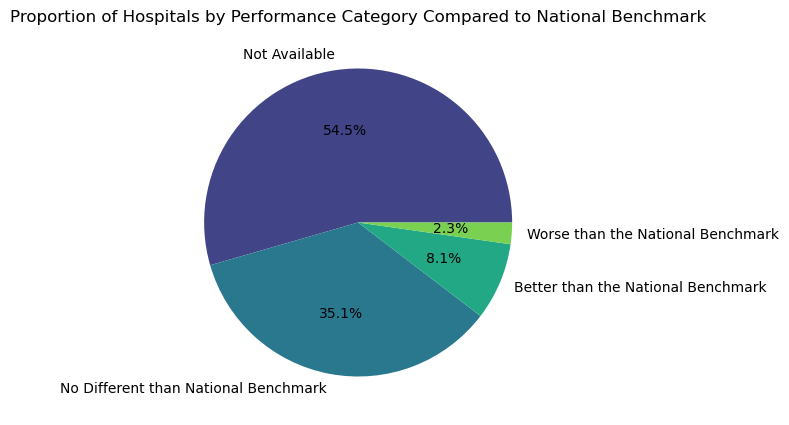

In [393]:
# Count the number of hospitals in each performance category
performance_counts = Hospital_infect_data['Compared to National'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(performance_counts)))
plt.title('Proportion of Hospitals by Performance Category Compared to National Benchmark')
plt.show()

Data cleaning needed since large portion of Not available data

# ETA-Measure-Specific Analysis

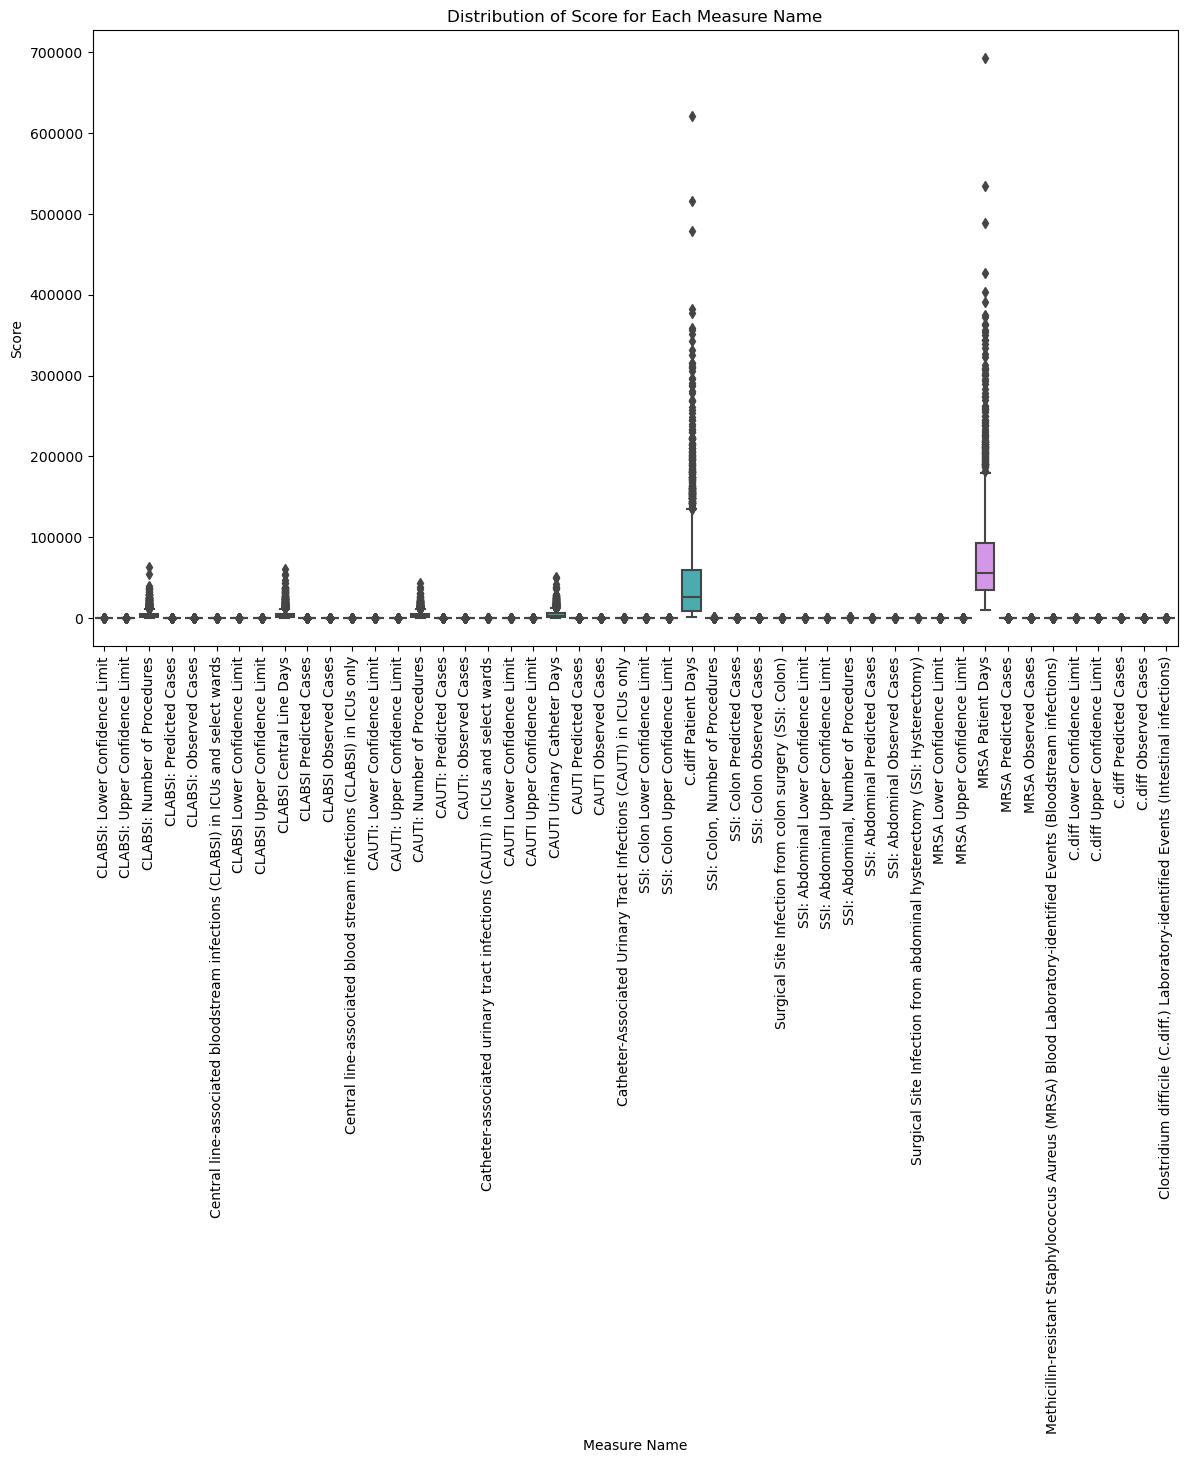

In [394]:
# Group by the 'Measure Name' column and describe the 'Score' column
measure_name_distribution = Hospital_infect_data.groupby('Measure Name')['Score'].describe()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Measure Name', y='Score', data=Hospital_infect_data)
plt.xticks(rotation=90)
plt.title('Distribution of Score for Each Measure Name')
plt.show()


Data has outliers.

# ETA- Regional Trend

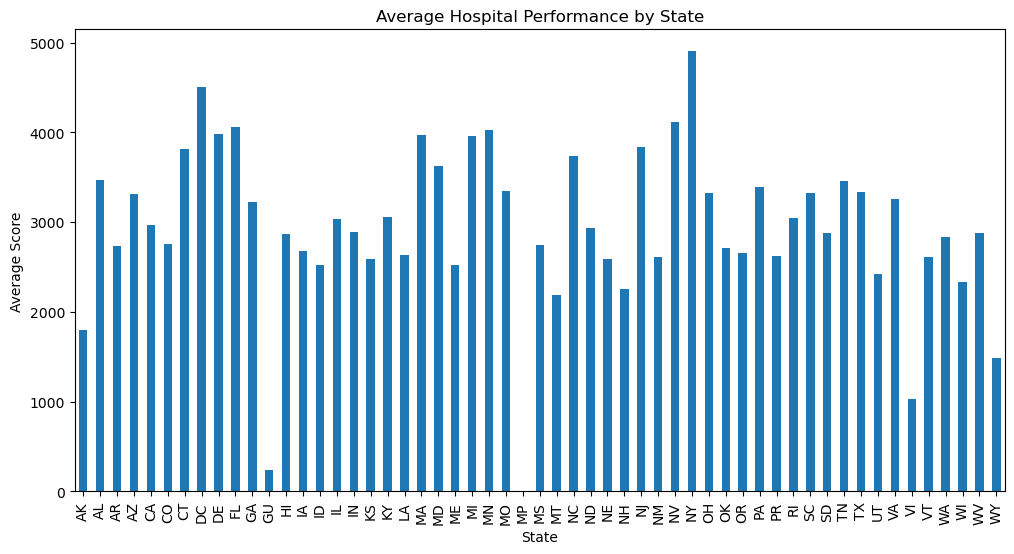

In [395]:
#Are hospitals in certain states performing better or worse than others? . High score poor management of infections.

state_performance = Hospital_infect_data.groupby('State')['Score'].mean()


plt.figure(figsize=(12, 6))
state_performance.plot(kind='bar')
plt.title('Average Hospital Performance by State')
plt.xlabel('State')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

Not availale data needed to be handled

# Data cleaning & data wrangling 

# Remove missing values

In [396]:
# Remove rows where 'Score' is missing
hospital_data_cleaned = Hospital_infect_data.dropna(subset=['Score'])

# Check the shape of the cleaned data
print(f"Data shape after removing missing scores: {hospital_data_cleaned.shape}")

# Optional: Check if there are any remaining missing values in 'Score'
print(f"Remaining missing values in 'Score': {hospital_data_cleaned['Score'].isna().sum()}")


Data shape after removing missing scores: (98147, 17)
Remaining missing values in 'Score': 0


In [397]:
# Remove rows where 'Compared to National' is 'Not Available'
hospital_data_filtered = hospital_data_cleaned[hospital_data_cleaned['Compared to National'] != 'Not Available']

# Check the shape of the filtered data
print(f"Data shape after removing 'Not Available' entries: {hospital_data_filtered.shape}")

# Optional: Check if there are any remaining 'Not Available' values
print(f"Remaining 'Not Available' entries: {hospital_data_filtered[hospital_data_filtered['Compared to National'] == 'Not Available'].shape[0]}")

Data shape after removing 'Not Available' entries: (98147, 17)
Remaining 'Not Available' entries: 0


In [398]:
hospital_data_filtered['Measure Name'] = hospital_data_filtered['Measure Name'].replace({
    'Central line-associated bloodstream infections (CLABSI) in ICUs and select wards': 
    'CLABSI: CLABSI_ICUs&select wards',
    
    'CLABSI Lower Confidence Limit': 
    'CLABSI: Lower Confidence Limit',
    
    'CLABSI Upper Confidence Limit': 
    'CLABSI: Upper Confidence Limit',
    
    'CLABSI Central Line Days': 
    'CLABSI: Central Line Days',
    
    'CLABSI Predicted Cases': 
    'CLABSI: Predicted Cases',
    
    'CLABSI Observed Cases': 
    'CLABSI: Observed Cases',
    
    'Central line-associated blood stream infections (CLABSI) in ICUs only': 
    'CLABSI: CLABSI_ICUs only',
    
    'Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards': 
    'CAUTI: CAUTI_ICUs&select wards',
    
    'CAUTI Lower Confidence Limit': 
    'CAUTI: CAUTI Lower Confidence Limit',
    
    'CAUTI Upper Confidence Limit': 
    'CAUTI: Upper Confidence Limit',
    
    'CAUTI Urinary Catheter Days': 
    'CAUTI: Urinary Catheter Days',
    
    'CAUTI Predicted Cases': 
    'CAUTI: Predicted Cases',
    
    'CAUTI Observed Cases': 
    'CAUTI: Observed Cases',
    
    'Catheter-Associated Urinary Tract Infections (CAUTI) in ICUs only': 
    'CAUTI: CAUTI_ICUs only',
    
    'C.diff Patient Days': 
    'C.diff: C.diff Patient Days',
    
    'Surgical Site Infection from colon surgery (SSI: Colon)': 
    'SSI: Surgical Site_colon surgery',
    
    'Surgical Site Infection from abdominal hysterectomy (SSI: Hysterectomy)': 
    'SSI: SSI_Hysterectomy',
    
    'MRSA Lower Confidence Limit': 
    'MRSA: MRSA Lower Confidence Limit',
    
    'MRSA Upper Confidence Limit': 
    'MRSA: MRSA Upper Confidence Limit',
    
    'MRSA Patient Days': 
    'MRSA: Patient Days',
    
    'MRSA Predicted Cases': 
    'MRSA: Predicted Cases',
    
    'MRSA Observed Cases': 
    'MRSA: Observed Cases',
    
    'Methicillin-resistant Staphylococcus Aureus (MRSA) Blood Laboratory-identified Events (Bloodstream infections)': 
    'MRSA: MRSA_Blood_Laboratory-identified Events',
    
    'C.diff Lower Confidence Limit': 
    'C.diff: C.diff Lower Confidence Limit',
    
    'C.diff Upper Confidence Limit': 
    'C.diff: C.diff Upper Confidence Limit',
    
    'C.diff Predicted Cases': 
    'C.diff: C.diff Predicted Cases', 
    
    'C.diff Observed Cases': 
    'C.diff: C.diff Observed Cases',
    
    'Clostridium difficile (C.diff.) Laboratory-identified Events (Intestinal infections)': 
    'C.diff: C.diff_Laboratory-identified Events'
})



In [399]:
hospital_data_filtered.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,Location,Year
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,No Different than National Benchmark,0.165,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,No Different than National Benchmark,3.249,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,No Different than National Benchmark,1485.000,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,No Different than National Benchmark,2.034,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,No Different than National Benchmark,2.000,NaN,01/01/2015,2015-06-30,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2015


In [400]:
# split the Measure name col. 

# Split the 'Measure Name' column into 'Abbreviation' and 'Description'
hospital_data_filtered[['Infection', 'Measure']] = hospital_data_filtered['Measure Name'].str.split(': ', n=1, expand=True)



In [401]:
hospital_data_filtered['Compared to National'] = hospital_data_filtered['Compared to National'].replace({
    'No Different than National Benchmark': 'same',
    'Worse than the National Benchmark': 'worse',
    'Better than the National Benchmark': 'better'
})



In [402]:
# List of columns to drop
columns_to_drop = ['Footnote', 'Location', 'Category',]

# Drop the columns if they exist in the DataFrame
hospital_data_filtered = hospital_data_filtered.drop(columns=[col for col in columns_to_drop if col in hospital_data_filtered.columns])


In [403]:
# Ensure the 'Measure Start Date' and 'Measure End Date' columns are in datetime format
hospital_data_filtered['Measure Start Date'] = pd.to_datetime(hospital_data_filtered['Measure Start Date'])
hospital_data_filtered['Measure End Date'] = pd.to_datetime(hospital_data_filtered['Measure End Date'])

# Calculate the number of days between 'Measure Start Date' and 'Measure End Date'
hospital_data_filtered['Number of Measure Days'] = (hospital_data_filtered['Measure End Date'] - hospital_data_filtered['Measure Start Date']).dt.days

In [404]:
hospital_data_filtered.head(5)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Measure Start Date,Measure End Date,Year,Infection,Measure,Number of Measure Days
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,same,0.165,2015-01-01,2015-06-30,2015,CLABSI,Lower Confidence Limit,180
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,same,3.249,2015-01-01,2015-06-30,2015,CLABSI,Upper Confidence Limit,180
2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Number of Procedures,HAI_1_DOPC_DAYS,same,1485.000,2015-01-01,2015-06-30,2015,CLABSI,Number of Procedures,180
3,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Predicted Cases,HAI_1_ELIGCASES,same,2.034,2015-01-01,2015-06-30,2015,CLABSI,Predicted Cases,180
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,CLABSI: Observed Cases,HAI_1_NUMERATOR,same,2.000,2015-01-01,2015-06-30,2015,CLABSI,Observed Cases,180


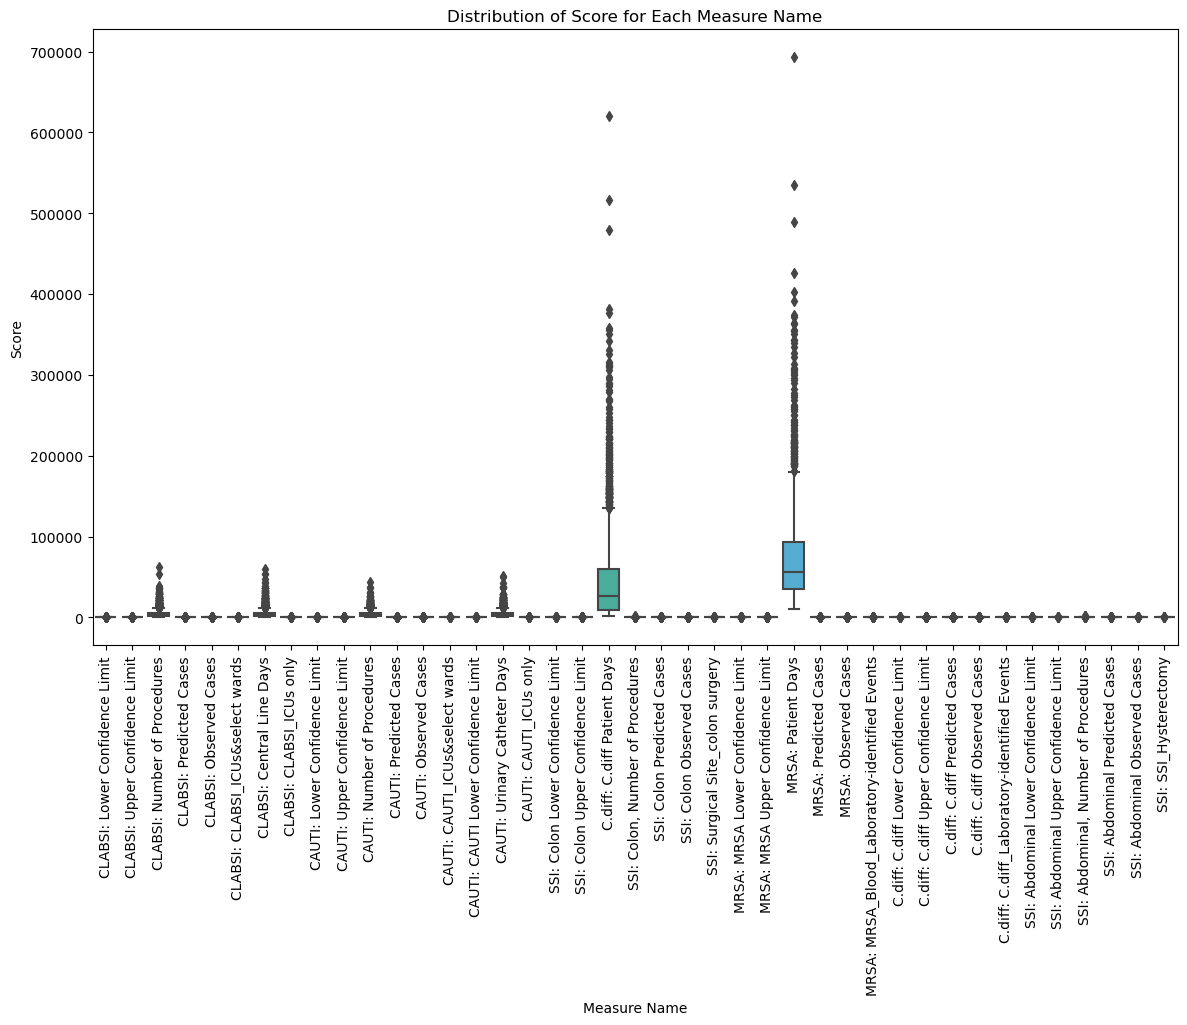

In [405]:
# Group by the 'Measure Name' column and describe the 'Score' column
measure_name_distribution = hospital_data_filtered.groupby('Measure Name')['Score'].describe()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Measure Name', y='Score', data=hospital_data_filtered)
plt.xticks(rotation=90)
plt.title('Distribution of Score for Each Measure Name')
plt.show()


# Freya edited the code to remove outliers

In [406]:
# Remove outliers
# Function to remove outliers based on the IQR
def remove_outliers(df, column):
    Q1 = hospital_data_filtered[column].quantile(0.25)
    Q3 = hospital_data_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return hospital_data_filtered[(hospital_data_filtered[column] >= lower_bound) & (hospital_data_filtered[column] <= upper_bound)]

# Apply the function to each group and combine the results back into a single DataFrame
cleaned_data = hospital_data_filtered.groupby(['Measure', 'Infection']).apply(lambda x: remove_outliers(x, 'Score')).reset_index(drop=True)



/var/folders/_b/93xtqrz559j5sdj7bxgvn69w0000gn/T/ipykernel_58071/3947896244.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_data = hospital_data_filtered.groupby(['Measure', 'Infection']).apply(lambda x: remove_outliers(x, 'Score')).reset_index(drop=True)


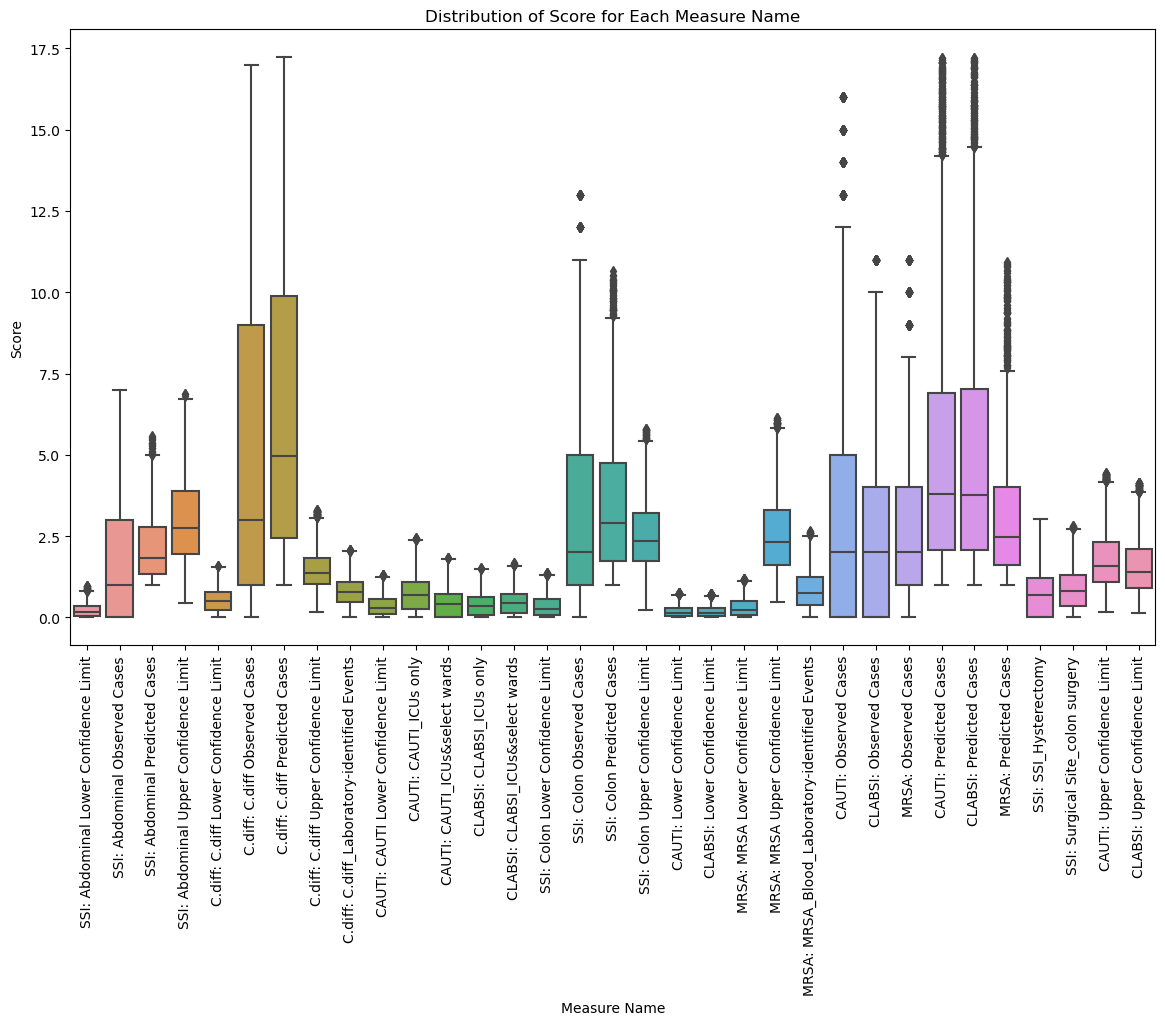

In [364]:
# Group by the 'Measure Name' column and describe the 'Score' column after removing outliers for each Measure Name
measure_name_distribution = cleaned_data.groupby('Measure Name')['Score'].describe()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Measure Name', y='Score', data=cleaned_data_step2)
plt.xticks(rotation=90)
plt.title('Distribution of Score for Each Measure Name')
plt.show()

In [407]:
# Save the DataFrame to a CSV file
filename = 'hospital_data_cleaned.csv'
cleaned_data.to_csv(filename, index=False)

In [408]:
cleaned_data.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Measure Name', 'Measure ID',
       'Compared to National', 'Score', 'Measure Start Date',
       'Measure End Date', 'Year', 'Infection', 'Measure',
       'Number of Measure Days'],
      dtype='object')

# Extract the data from above df to store in three tables for a database


# Freya: Code changed to creat only two tables

In [409]:
# Extract Hospitals table
hospitals_df = cleaned_data[['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number']].drop_duplicates()

filename = 'hospital_df.csv'
hospitals_df.to_csv(filename, index=False)

In [410]:
hospitals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3288 entries, 0 to 69237
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provider ID    3288 non-null   int64 
 1   Hospital Name  3288 non-null   object
 2   Address        3288 non-null   object
 3   City           3288 non-null   object
 4   State          3288 non-null   object
 5   ZIP Code       3288 non-null   int64 
 6   County Name    3282 non-null   object
 7   Phone Number   3288 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 231.2+ KB


In [411]:
# Extract Measures table
measures_df = cleaned_data[['Measure ID', 'Measure Name', 'Infection', 'Measure Start Date', 'Measure End Date','Compared to National', 'Score','Provider ID']].drop_duplicates()

filename = 'measure_score_df.csv'
measures_df.to_csv(filename, index=False)


In [412]:
measures_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77829 entries, 0 to 77828
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Measure ID            77829 non-null  object        
 1   Measure Name          77829 non-null  object        
 2   Infection             77829 non-null  object        
 3   Measure Start Date    77829 non-null  datetime64[ns]
 4   Measure End Date      77829 non-null  datetime64[ns]
 5   Compared to National  77829 non-null  object        
 6   Score                 77829 non-null  float64       
 7   Provider ID           77829 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 5.3+ MB


# Perform ETA again and do Data Analysis

# Hospital performance Compared to National Benchmarks:

In [413]:
# Categorize hospitals into 'Better', 'Worse', or 'Same' based on performance compared to national benchmarks
performance_categories = cleaned_data['Compared to National'].value_counts()
print(performance_categories)

# Group by performance category and count the number of hospitals in each category
performance_group = cleaned_data.groupby('Compared to National')['Measure ID'].count()
print(performance_group)

Compared to National
same      2501287
better     542266
worse      147436
Name: count, dtype: int64
Compared to National
better     542266
same      2501287
worse      147436
Name: Measure ID, dtype: int64


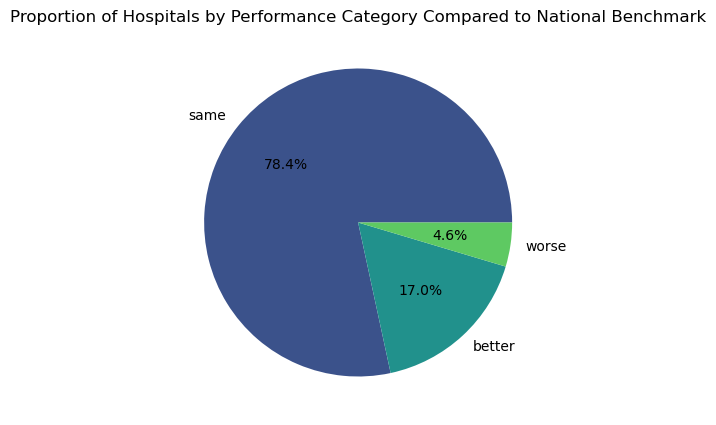

In [414]:
# Count the number of hospitals in each performance category
performance_counts = cleaned_data['Compared to National'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(performance_counts)))
plt.title('Proportion of Hospitals by Performance Category Compared to National Benchmark')
plt.show()

Results: Larger proprtion of hospital perform same as national benchmark

# How various measures are performing compared to national standards?

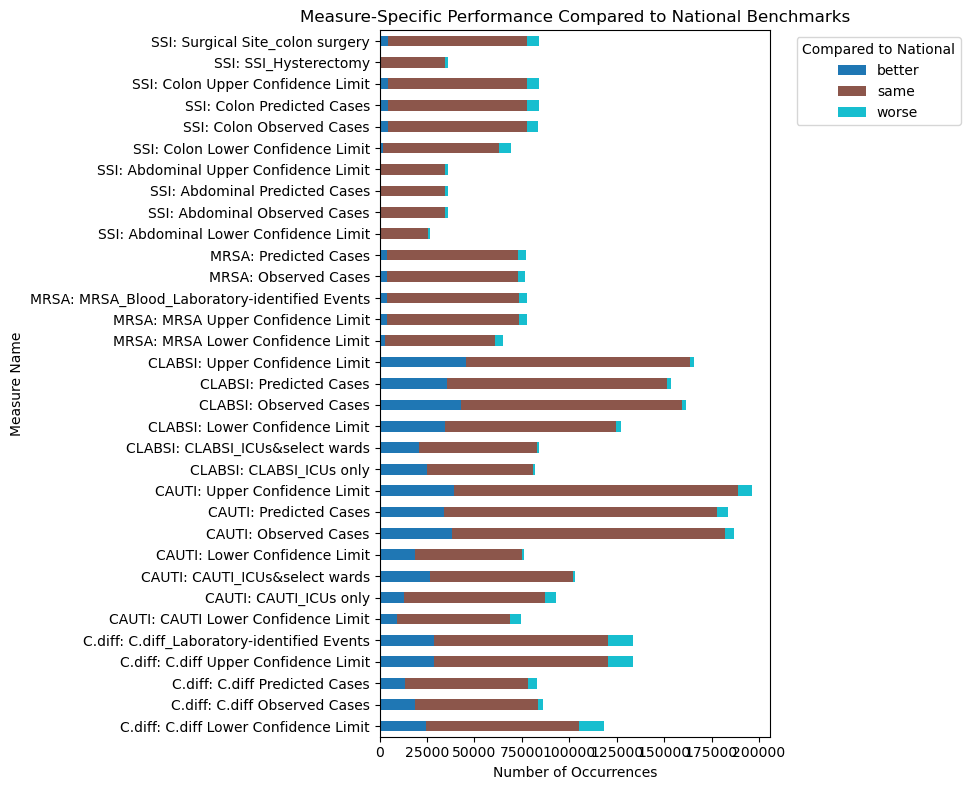

In [415]:
# Group by 'Measure Name' and 'Compared to National' and count occurrences
measure_performance = cleaned_data.groupby(['Measure Name', 'Compared to National']).size().unstack(fill_value=0)

# Plot the horizontal stacked bar chart
measure_performance.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='tab10')

# Add title and labels
plt.title('Measure-Specific Performance Compared to National Benchmarks')
plt.xlabel('Number of Occurrences')
plt.ylabel('Measure Name')

# Add legend
plt.legend(title='Compared to National', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

Null Hypothesis (H₀): Hospital performance (better, same, worse) is independent of the infection control measure. 
Alternative Hypothesis (H₁): Hospital performance (better, same, worse) is dependent on the infection control measure. 

In [416]:
from scipy.stats import chi2_contingency

# Group by 'Measure Name' and 'Compared to National' and count occurrences
measure_performance = cleaned_data.groupby(['Measure Name', 'Compared to National']).size().unstack(fill_value=0)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(measure_performance)

# Print the Chi-Square statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 234834.81145555558
P-value: 0.0


Results: reject the null hypothesis. Type of measure significantly influences how hospitals perform compared to national benchmarks

# Regional Performance Compared to National Benchmarks

Is there a significant association between regions (states) and performance categories of hosital (better, same, worse)

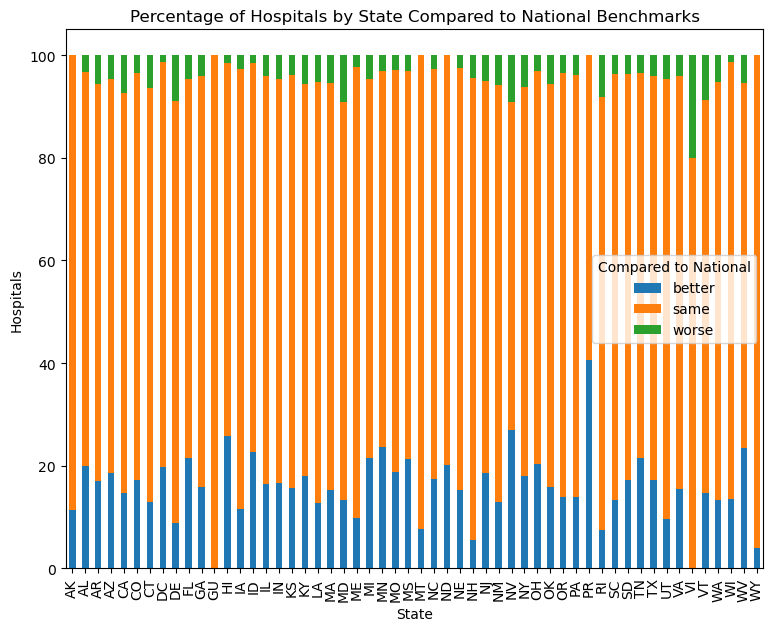

In [417]:
# Group by state and performance compared to national benchmarks
state_performance = cleaned_data.groupby(['State', 'Compared to National'])['Measure ID'].count().unstack().fillna(0)

# Calculate percentage distribution
state_performance_percentage = state_performance.div(state_performance.sum(axis=1), axis=0) * 100

# Plot the percentage stacked bar chart
ax = state_performance_percentage.plot(kind='bar', stacked=True, figsize=(9, 7))

plt.title('Percentage of Hospitals by State Compared to National Benchmarks')
plt.xlabel('State')
plt.ylabel('Hospitals')
plt.legend(title='Compared to National')
plt.xticks(rotation=90)
plt.show()

In [418]:
# perform chisqure
from scipy.stats import chi2_contingency

# Create a contingency table (State vs. Compared to National)
contingency_table = pd.crosstab(cleaned_data['State'], cleaned_data['Compared to National'])

# Apply the Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 51014.85454869214
P-value: 0.0


Results: Hospital performance (better, same, worse) is significantly associated with the state the hospital is in.